# Lab 2 MATH317

Guillaume Collin 261115974

In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np

## Part 1

## a) Implementation of sin(x) via power series

The following equation is the power series of the sin(x) function which is the equation on which my algorithm will be constructed: 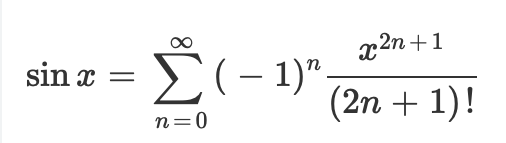

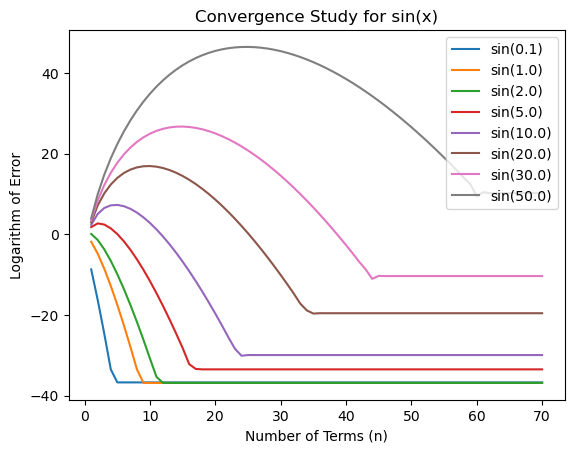


Values for x = 0.1:
n=5: Approx = 0.09983341664682817, Real = 0.09983341664682815
n=10: Approx = 0.09983341664682817, Real = 0.09983341664682815
n=15: Approx = 0.09983341664682817, Real = 0.09983341664682815
n=25: Approx = 0.09983341664682817, Real = 0.09983341664682815
n=30: Approx = 0.09983341664682817, Real = 0.09983341664682815
n=50: Approx = 0.09983341664682817, Real = 0.09983341664682815
n=70: Approx = 0.09983341664682817, Real = 0.09983341664682815

Values for x = 1.0:
n=5: Approx = 0.8414710097001764, Real = 0.8414709848078965
n=10: Approx = 0.8414709848078965, Real = 0.8414709848078965
n=15: Approx = 0.8414709848078965, Real = 0.8414709848078965
n=25: Approx = 0.8414709848078965, Real = 0.8414709848078965
n=30: Approx = 0.8414709848078965, Real = 0.8414709848078965
n=50: Approx = 0.8414709848078965, Real = 0.8414709848078965
n=70: Approx = 0.8414709848078965, Real = 0.8414709848078965

Values for x = 2.0:
n=5: Approx = 0.909347442680776, Real = 0.9092974268256817
n=10: Approx

In [2]:
def sin(x, n):
    value = 0
    for i in range(n):
        value += (((-1)**i)*(x**(2*i+1)))/math.factorial(2*i + 1) #We use the above equation
    return value

def calculate_error(x, n):
    true_value = math.sin(x)
    approx_value = sin(x, n)
    error = abs(true_value - approx_value)
    epsilon = 1e-16 #Otherwise get a domain error for the math.log, division by 0
    return math.log(error + epsilon)

def study_convergence(x_values, n_values):
    for x_value in x_values:
        errors = [calculate_error(x_value, n) for n in n_values]
        plt.plot(n_values, errors, label=f'sin({x_value})')

    plt.xlabel('Number of Terms (n)')
    plt.ylabel('Logarithm of Error')
    plt.title('Convergence Study for sin(x)')
    plt.legend()
    plt.show()

# Example usage:
x_values_to_study = [0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0]
n_values_to_study = range(1, 71)

study_convergence(x_values_to_study, n_values_to_study)

def print_values_for_n(x_values, n_values):
    for x in x_values:
        print(f"\nValues for x = {x}:")
        for n in n_values:
            approx_value = sin(x, n)
            real_value = math.sin(x)
            print(f"n={n}: Approx = {approx_value}, Real = {real_value}")

# Example usage:
x_values_to_print = [0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0]
n_values_to_print = [5, 10, 15, 25, 30, 50, 70]

print_values_for_n(x_values_to_print, n_values_to_print)

Observing the behavior of the approximation function, we notice that as the value of x increases, the accuracy of the approximation diminishes. For x greater than 5, an intriguing pattern emerges: initially, there's a positive slope. In this phase, adding more terms (n) doesn't significantly enhance accuracy; it might even introduce more error. However, beyond a critical point, the slope reaches a maximum and then becomes negative. When we reach a point where x^(2n + 1) ~ !(2n +1). At this stage, further increasing the number of terms leads to a more accurate approximation, signifying a more effective convergence of the series.

Moreover, for x values in the range [0, 2], the final errors converge to the same value, indicating consistent accuracy. However, for x values of 5, 10, 20, 30, and 50, the final errors are less favorable. It appears that as x increases, achieving a satisfactory approximation requires a larger number of terms, resulting in comparatively poorer final errors.

The (average) slope of the graph signifies the rate of convergence of the series as you increase the number of terms ("n"). In other words, it gives you an idea on how quickly the series is approaching the true value (in this case, the sin function) as you add more terms to approximate.

A steeper negative slope indicates faster convergence, meaning that with a relatively small number of terms, my approximation is getter closer to the true value. On the other hand, a shallower slope suggests slower convergence, and you would need more terms to achieve the same level of accurary. 

REMARK: A part of the error is due to the addition of the epsilon which is unfortunately required, otherwise we get a domain error because division by 0. 

## b) Version 2.0 of sin

When dealing with the sine function, there are two primary methods for argument reduction. 

The first involves leveraging periodicity and symmetry. Given that sin(-x) = -sin(x). Also, sin(y) = sin(x) when y = x + 2*pi*n for n integer, periodic properties allow us to simplify and manipulate arguments effectively. Finally, we also know that the image of sin is completly defined on the interval x of [-pi/2, pi/2] and the interval [-pi, pi].


The second approach involves applying the double-angle formula identity to simplify and manipulate the arguments of the sine function. In the textbook:
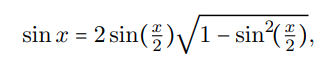


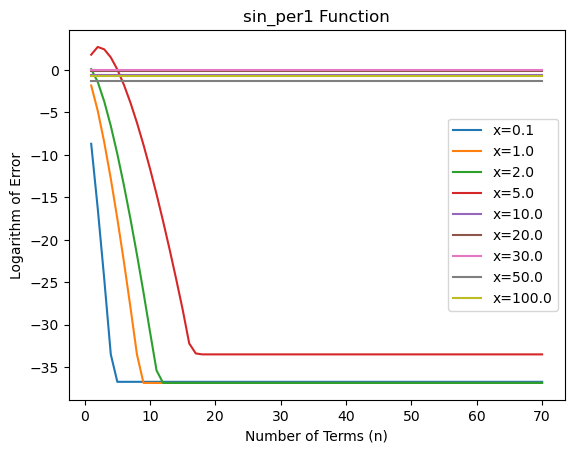

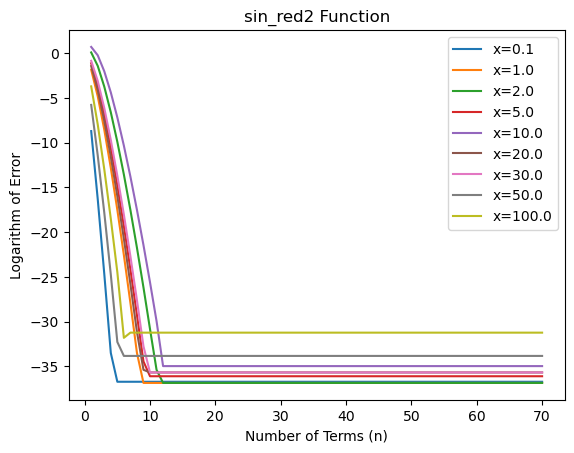

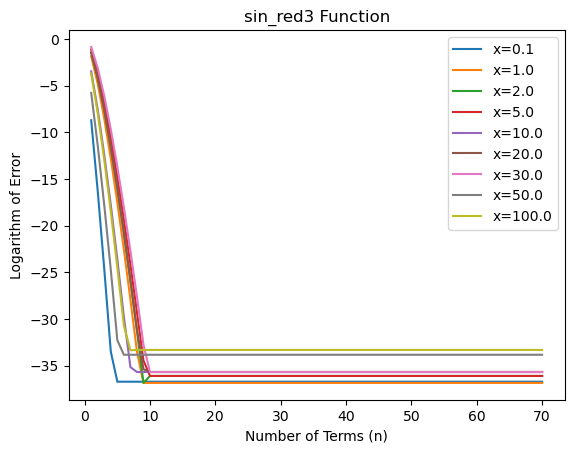

In [3]:
def sin_per1(x, n): #Reduction to x interval [0, 2pi]
    neg = False
    if x < 0: #Check if x is negative
        neg = True
        x *= -1 #Make it positive
        
    if x > 2*math.pi:
        x = x % 2*math.pi
    
    value = 0 #initial 0
    for i in range(n): #get n terms as specified in function call
        value += ((-1)**i)*(x**(2*i+1))/(math.factorial(2*i + 1)) #use the Taylor series
    if neg: #If negative use symmetry
        return -1 * value
    
    return value #return the final value

def reduction2(x): #Reduction of x to interval [-pi, pi]
    while x > math.pi:
        x -= 2 * math.pi
    while x < -math.pi:
        x += 2 * math.pi
    return x

def reduction3(x): #Reduction to [-pi/2, pi/2]
    x = x % (2 * math.pi)  
    if x > math.pi:
        x = x - 2 * math.pi
    if x < -math.pi:
        x = x + 2 * math.pi
    if x > math.pi / 2:
        x = math.pi - x
    if x < -math.pi / 2:
        x = -math.pi - x
    return x
    
def sin_red2(x, n): #Using reduction to [-pi, pi]
    x = reduction2(x)
    value = 0
    for i in range(n):
        value += (((-1)**i)*(x**(2*i+1)))/math.factorial(2*i + 1) #We use the power series
    return value

def sin_red3(x, n): #Using reduction to [-pi/2, pi/2]
    x = reduction3(x)
    value = 0
    for i in range(n):
        value += (((-1)**i)*(x**(2*i+1)))/math.factorial(2*i + 1) #We use the power series
    return value

def sin_id1(x, n):
    neg = False
    if x < 0:
        neg = True
        x *= -1

    if x > 2 * math.pi:
        x = x % (2 * math.pi)

    x /= 2

    value = 0
    for i in range(n):
        value += ((-1)**i)*(x**(2*i+1))/(math.factorial(2*i + 1))#We use the power series

    if neg:
        value *= -1

    # Ensure the argument of the square root is within the valid range
    value = min(1.0, max(-1.0, value))

    return 2 * value * math.sqrt(1 - value**2)

def sin_id2(x, n): #Use half angle and reduction 2
    x = reduction2(x)
    value = 0
    for i in range(n):
        value += ((-1)**i)*(x**(2*i+1))/(math.factorial(2*i + 1))#We use the power series

    # Ensure the argument of the square root is within the valid range
    value = min(1.0, max(-1.0, value))

    return 2 * value * math.sqrt(1 - value**2)

def sin_id3(x, n): #Use half angle and reduction 3
    x = reduction3(x)
    value = 0
    for i in range(n):
        value += ((-1)**i)*(x**(2*i+1))/(math.factorial(2*i + 1))

    # Ensure the argument of the square root is within the valid range
    value = min(1.0, max(-1.0, value))

    return 2 * value * math.sqrt(1 - value**2)

def calculate_log_error(method, x, n):
    true_value = math.sin(x)
    approx_value = method(x, n)
    error = abs(true_value - approx_value)
    epsilon = 1e-16  # Small epsilon value to avoid division by zero
    return math.log(error + epsilon)

def plot_results(method, x_values, n_values, title):
    for x in x_values:
        log_errors = [calculate_log_error(method, x, n) for n in n_values]
        plt.plot(n_values, log_errors, label=f'x={x}')

    plt.xlabel('Number of Terms (n)')
    plt.ylabel('Logarithm of Error')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage:
x_values_to_compare = [0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0, 100.0]
n_values_to_compare = range(1, 71)

# Plot for each method
methods_to_compare = [
    ("sin_per1", sin_per1),
    ("sin_red2", sin_red2),
    ("sin_red3", sin_red3)
]

for method_name, method_func in methods_to_compare:
    plot_results(method_func, x_values_to_compare, n_values_to_compare, f'{method_name} Function')

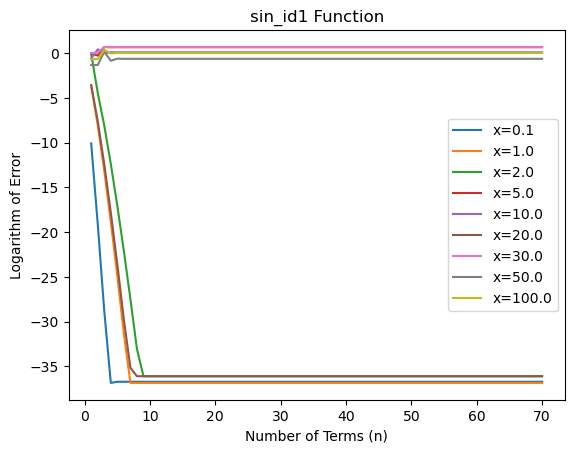

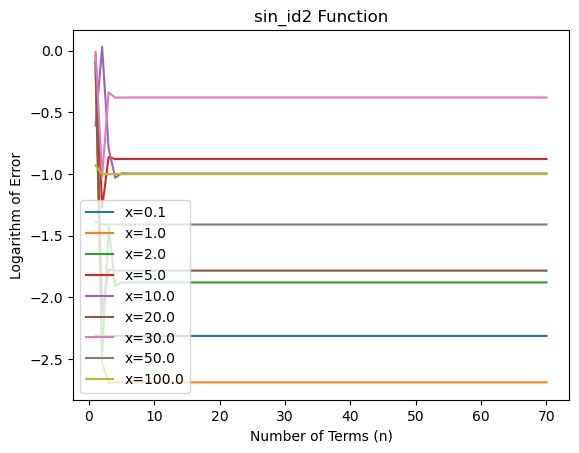

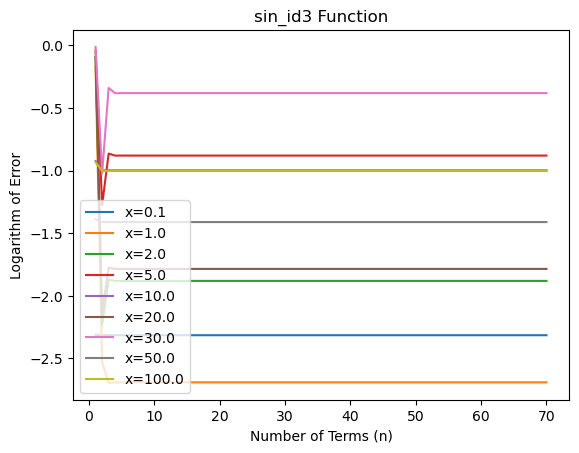

In [4]:
# Example usage:
x_values_to_compare = [0.1, 1.0, 2.0, 5.0, 10.0, 20.0, 30.0, 50.0, 100.0]
n_values_to_compare = range(1, 71)

# Plot for each method
methods_to_compare = [
    ("sin_id1", sin_id1),
    ("sin_id2", sin_id2),
    ("sin_id3", sin_id3)
]

for method_name, method_func in methods_to_compare:
    plot_results(method_func, x_values_to_compare, n_values_to_compare, f'{method_name} Function')

By examining the graphs, its evident that the sin_red3 function outperforms the others. Across all values of x, the function consistently converge to a logarithm of error of ~ -37, signifying a high level of accuracy. While sin_red2 also achieves this desirable convergence, sind_red3 exhibits a slightly superior performance, facilitating a quicker convergence for the given x.

Thus, we will choose sin_red3, the function reducing x to the interval [-pi/2, pi/2] as our sin 2.0 function.

## Demonstrate superiority of version 2.0

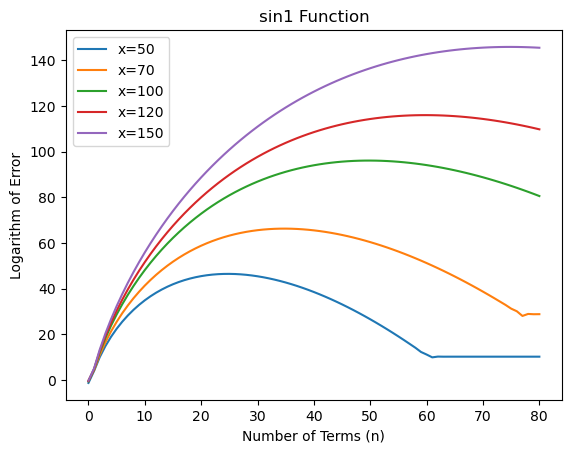

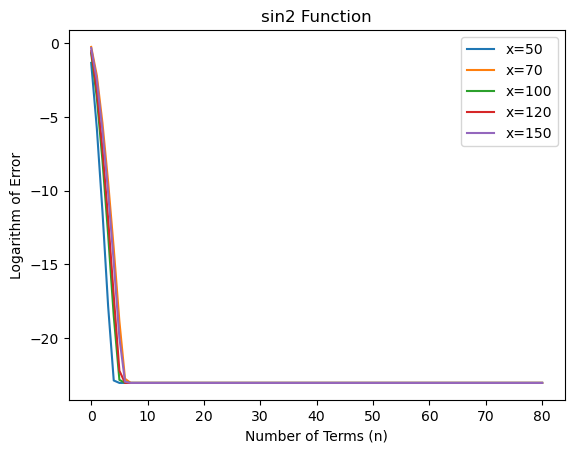

In [5]:
def sin1(x,n):
    value = 0
    for i in range(n):
        value += (((-1)**i)*(x**(2*i+1)))/math.factorial(2*i + 1) #We use the power series
    return value

def reduction3(x): #Reduction to [-pi/2, pi/2]
    x = x % (2 * math.pi)  
    if x > math.pi:
        x = x - 2 * math.pi
    if x < -math.pi:
        x = x + 2 * math.pi
    if x > math.pi / 2:
        x = math.pi - x
    if x < -math.pi / 2:
        x = -math.pi - x
    return x

def sin2(x,n):
    x = reduction3(x)
    value = 0
    for i in range(n):
        value += (((-1)**i)*(x**(2*i+1)))/math.factorial(2*i + 1) #We use the power series
    return value

def calculate_log_error(true_value, approx_value):
    error = abs(true_value - approx_value)
    epsilon = 1e-10  # Small epsilon value to avoid division by zero
    return math.log(error + epsilon)

def plot_results(method, x_values, n_values, title):
    for x in x_values:
        log_errors = [calculate_log_error(math.sin(x), method(x, n)) for n in n_values]
        plt.plot(n_values, log_errors, label=f'x={x}')

    plt.xlabel('Number of Terms (n)')
    plt.ylabel('Logarithm of Error')
    plt.title(title)
    plt.legend()
    plt.show()

def print_real_values(x_values, n_values, methods):
    for x in x_values:
        print(f"\nReal Values for x = {x}:")
        for n in n_values:
            true_value = math.sin(x)
            print(f"n={n}: sin({x}) = {true_value}", end='   ')
            for method_name, method_func in methods:
                approx_value = method_func(x, n)
                print(f"{method_name}({x}, {n}) = {approx_value}", end='   ')
            print()

# Example usage:
x_values_to_compare = [50, 70, 100, 120, 150] #Can't use floating point values otherwise get overflow error
n_values_to_compare = range(0, 81) #I can't go higher otherwise I get an overflow error

# Methods to compare
methods_to_compare = [
    ("sin1", sin1),
    ("sin2", sin2),
]

# Plot for each method
for method_name, method_func in methods_to_compare:
    plot_results(method_func, x_values_to_compare, n_values_to_compare, f'{method_name} Function')

In [6]:
# Print real values for comparison
print_real_values(x_values_to_compare, [30, 40, 50, 60, 70, 80], methods_to_compare)



Real Values for x = 50:
n=30: sin(50) = -0.26237485370392877   sin1(50, 30) = -5.158388692673131e+19   sin2(50, 30) = -0.2623748537039268   
n=40: sin(50) = -0.26237485370392877   sin1(50, 40) = -5.199561096205846e+16   sin2(50, 40) = -0.2623748537039268   
n=50: sin(50) = -0.26237485370392877   sin1(50, 50) = -337533737658.22314   sin2(50, 50) = -0.2623748537039268   
n=60: sin(50) = -0.26237485370392877   sin1(50, 60) = -65715.75356507907   sin2(50, 60) = -0.2623748537039268   
n=70: sin(50) = -0.26237485370392877   sin1(50, 70) = -25906.595902187637   sin2(50, 70) = -0.2623748537039268   
n=80: sin(50) = -0.26237485370392877   sin1(50, 80) = -25906.59573396985   sin2(50, 80) = -0.2623748537039268   

Real Values for x = 70:
n=30: sin(70) = 0.7738906815578891   sin1(70, 30) = -3.0449619589691992e+28   sin2(70, 30) = 0.7738906815578908   
n=40: sin(70) = 0.7738906815578891   sin1(70, 40) = -2.821451144570789e+28   sin2(70, 40) = 0.7738906815578908   
n=50: sin(70) = 0.773890681557889

The superiority of sin 2.0 becomes apparent when observing the graphs and numerical outcomes. Version 2.0 converges swiftly to provide a highly accurate approximation of the sine value, while version 1.0 encounters difficulties in converging to the real value, even with 80 terms. This difference highlights the more efficient convergence of sin 2.0 compared to version 1.0. Also, the superiority of version 2.0 is noted by the fact that for all values of x, the final accuracy is the same whilst for the version 1.0, the different values of x get different final accuracy.

DISCLAIMER: I am not able to use more than 80 terms, otherwise I get an overflow error. I know this isnt ideal since to have convergence for the version 1.0 we need a lot a terms to reach the point where x^(2n+1) ~ (2n+1)!

# c) Implement ln function

When dealing with the natural logarithm (ln) function, there are several techniques at our disposal. These include:
The Mercator series:
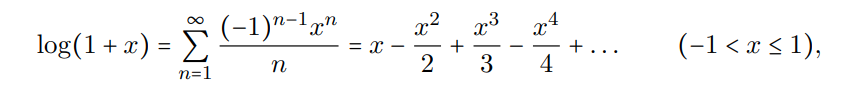
The inverse Mercator series: Same as the Mercator but you use ln(x) = -ln(1/x)
The Gregory series:
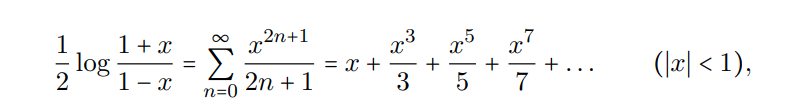
The Gregory series with argument reduction once:
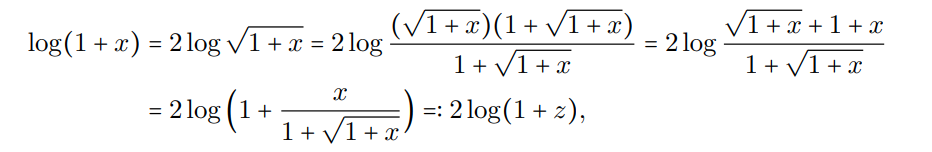

We use the argument reduction technique in all instance. Except for the Gregory series

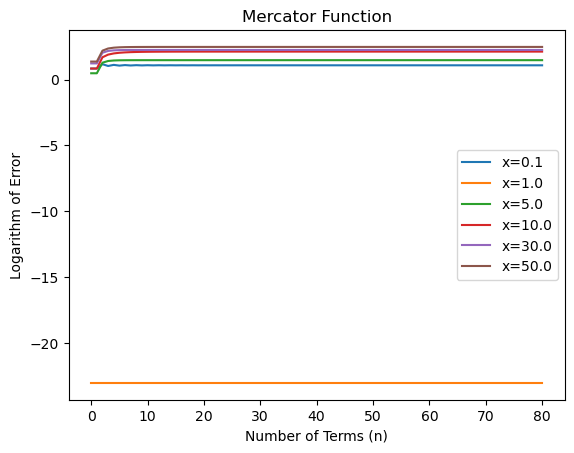

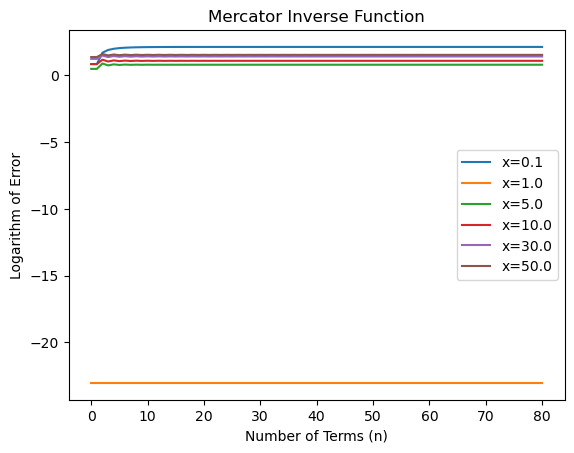

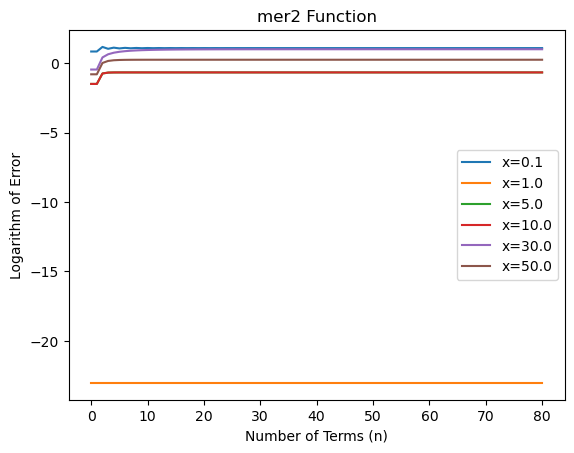

In [7]:
def ln_mer(x, n):
    #get ln(1+x)
    x -= 1.
        
    nb_red = 0
    while x > 1.0:#need -1 < x <= 1 It cant be less than -1 since initially x > 0.
        x = x/(1 + math.sqrt(1+x))
        nb_red += 1
        
    value = 0
    for i in range(1, n): #Apply Mercator series
        value += (-1**(i-1))*(x**i) / i
    
    return (2**nb_red)*value
def ln_mer2(x, n):
    nb_red = 0
    while x > 2:#Multiplicative argument reduction
        x = x/2
        nb_red += 1
        
    #get ln(1+x)
    x -= 1.
        
    value = 0
    for i in range(1, n): #Apply Mercator series
        value += (-1**(i-1))*(x**i) / i
    
    return (nb_red*math.log(2))+value
        
def ln_merInv(x, n):
    
    x = 1/x #reverse it
    x -= 1. #get ln(1+x)
        
    nb_red = 0
    while x > 1.0:#need -1 < x <= 1
        x = x/(1 + math.sqrt(1+x))
        nb_red += 1
        
    value = 0
    for i in range(1, n): #Apply Mercator series
        value += (-1**(i-1))*(x**i) / i
    
    return (2**nb_red)*(-1)*value

def ln_greg(x, n):
    x = (x - 1)/(x+1) #New x value, will always be |x| < 1
    
    value = 0
    for i in range(n): #Apply Gregory series
        value += (x**(2*i+1))/(2*i+1)
        
    return 2*value
    
def ln_greg2(x,n):
    x -= 1
    x /= (1 + math.sqrt(1+x)) #Apply reduction once
    
    x = ((x+1)-1)/((x+1)+1) #New x value
    
    value = 0
    for i in range(n): #Apply Gregory series
        value += (x**(2*i+1))/(2*i+1)
        
    return 4*value
    
def calculate_log_error(true_value, approx_value):
    error = abs(true_value - approx_value)
    epsilon = 1e-10 # Small epsilon value to avoid division by zero
    return math.log(error + epsilon)

def plot_results(method, x_values, n_values, title):
    for x in x_values:
        log_errors = [calculate_log_error(math.log(x), method(x, n)) for n in n_values]
        plt.plot(n_values, log_errors, label=f'x={x}')

    plt.xlabel('Number of Terms (n)')
    plt.ylabel('Logarithm of Error')
    plt.title(title)
    plt.legend()
    plt.show()
            
# Example usage:
x_values_to_compare = [0.1, 1.0, 5.0, 10.0, 30.0, 50.0] #Can't use floating point values otherwise get overflow error
n_values_to_compare = range(0, 81) #I can't go higher otherwise I get an overflow error

# Methods to compare
methods_to_compare = [
    ("Mercator", ln_mer),
    ("Mercator Inverse", ln_merInv),
    ("mer2", ln_mer2)
]

# Plot for each method
for method_name, method_func in methods_to_compare:
    plot_results(method_func, x_values_to_compare, n_values_to_compare, f'{method_name} Function')
             

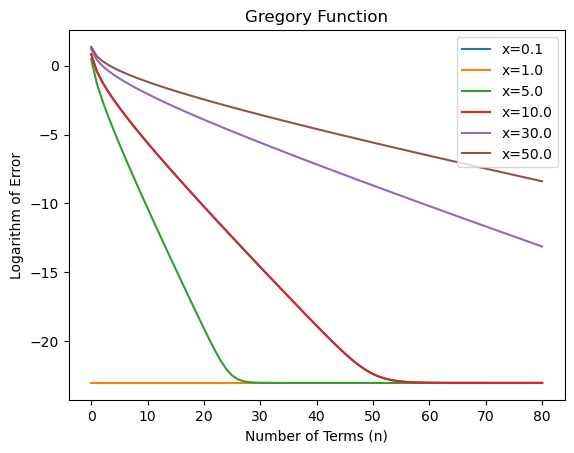

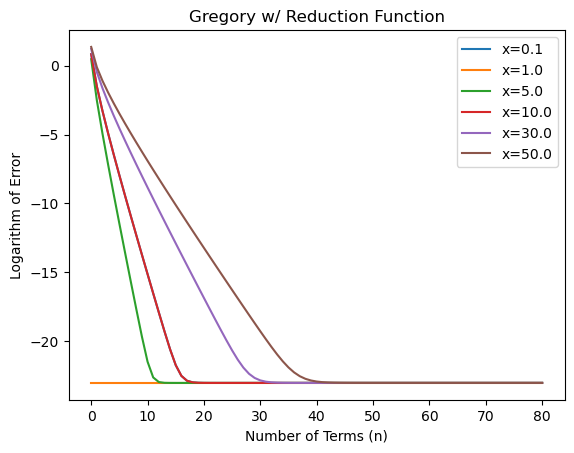

In [8]:
#Have to put the graphs 2 by 2 otherwise not aesthically pleasing
methods_to_compare= [("Gregory", ln_greg),
    ("Gregory w/ Reduction", ln_greg2)
]

# Plot for each method
for method_name, method_func in methods_to_compare:
    plot_results(method_func, x_values_to_compare, n_values_to_compare, f'{method_name} Function')
        

As anticipated, the Mercator functions fall significantly short compared to the Gregory methods. They fail to converge to an acceptable error level. In contrast, the Gregory functions exhibit rapid convergence, achieving a logarithm of error of approximately -25, indicating high accuracy. Notably, the Gregory method with reduction outperforms the version without reduction, demonstrating a notably faster convergence.

Thus, the Gregory with Reduction is the best method and the one we choose.

# d) Ways to compute ln(3)

To calculate ln(3), we can employ four distinct methods:

a) Utilize the Mercator series, preceded by argument reduction since 3 exceeds 2. We perform argument reduction using the identity discussed in the preceding question.

b) Apply the inverse Mercator series: ln(3) = -ln(1/3).

c) Employ the Gregory series, where we solve (3-1)/(3+1) to find x = 1/2

d) Employ the Gregory series after initially applying the reduction technique from the previous question.

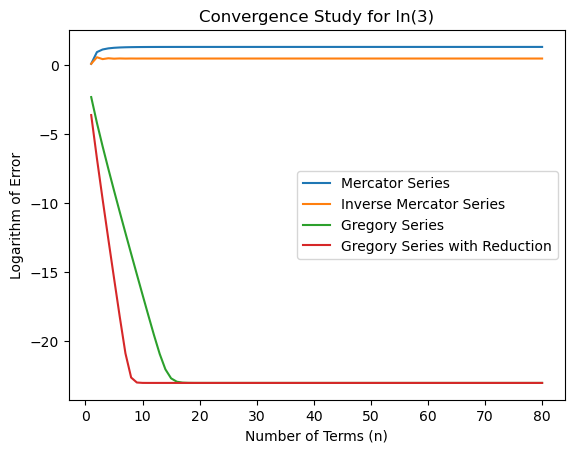

In [9]:
def lnMerc(n):
    x = 2 #3 = 1+2
    x = 2/(1+math.sqrt(1+2))
    
    value = 0
    for i in range(1, n): #Apply Mercator series
        value += ((-1**(i-1))*(x**i)) / i
        
    return 2*value

def lnMercInv(n):
    x = 1/3 - 1
    
    value = 0
    for i in range(1, n): #Apply Mercator series
        value += (-1**(i-1))*(x**i) / i
        
    return (-1)*value

def lnGreg(n):
    x = (3-1)/(3+1)
    
    value = 0
    for i in range(n): #Apply Gregory series
        value += (x**(2*i+1))/(2*i+1)
        
    return 2*value

def lnGreg2(n):
    x = 2/(1+math.sqrt(3))
    
    x = ((x+1)-1)/((x+1)+1) #New x value
    
    value = 0
    for i in range(n): #Apply Gregory series
        value += (x**(2*i+1))/(2*i+1)
        
    return 4*value

# Study convergence for ln(3) using the four methods
n_values = range(1, 81)  # Adjust the range of n values as needed

# Plot convergence for ln(3) using Mercator series
log_errors_merc = [math.log(abs(math.log(3) - lnMerc(n)) + 1e-10) for n in n_values]
plt.plot(n_values, log_errors_merc, label='Mercator Series')

# Plot convergence for ln(3) using Inverse Mercator series
log_errors_inv_merc = [math.log(abs(math.log(3) - lnMercInv(n)) + 1e-10) for n in n_values]
plt.plot(n_values, log_errors_inv_merc, label='Inverse Mercator Series')

# Plot convergence for ln(3) using Gregory series
log_errors_greg = [math.log(abs(math.log(3) - lnGreg(n)) + 1e-10) for n in n_values]
plt.plot(n_values, log_errors_greg, label='Gregory Series')

# Plot convergence for ln(3) using Gregory series with reduction
log_errors_greg2 = [math.log(abs(math.log(3) - lnGreg2(n)) + 1e-10) for n in n_values]
plt.plot(n_values, log_errors_greg2, label='Gregory Series with Reduction')

plt.xlabel('Number of Terms (n)')
plt.ylabel('Logarithm of Error')
plt.title('Convergence Study for ln(3)')
plt.legend()
plt.show()

As evident from the analysis in the previous question, the Gregory methods exhibit significantly faster convergence compared to the Mercator methods. Furthermore, the Gregory method with reduction surpasses its counterpart without reduction in terms of convergence speed. Notably, the Gregory methods outperform the Mercator methods to such an extent that the latter fail to converge to a satisfactory approximation.

# PART 2

## a) Goldschmidt vs Heron

Heron's method (from textbook):
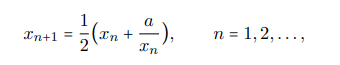
Goldschmidt method (from textbook):
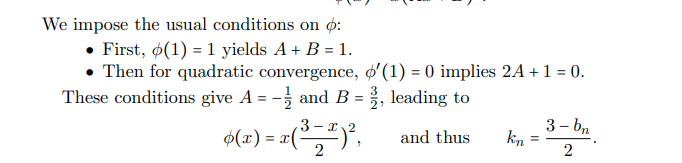

## Experiment:
    
### Analysis:

Compare the accuracy of the computed square roots for both methods against the known square roots.

### Self-Correcting Behavior (Heron's Method):

Choose an input value and deliberately introduce an error in the initial guess.
Observe how Heron's method corrects the error over iterations.
Record the computed square roots at each iteration.

### Opposite Behavior (Goldschmidt's Method):

Choose an input value and deliberately introduce an error in the initial guess.
Observe how Goldschmidt's method amplifies the error over iterations.
Record the computed square roots at each iteration.

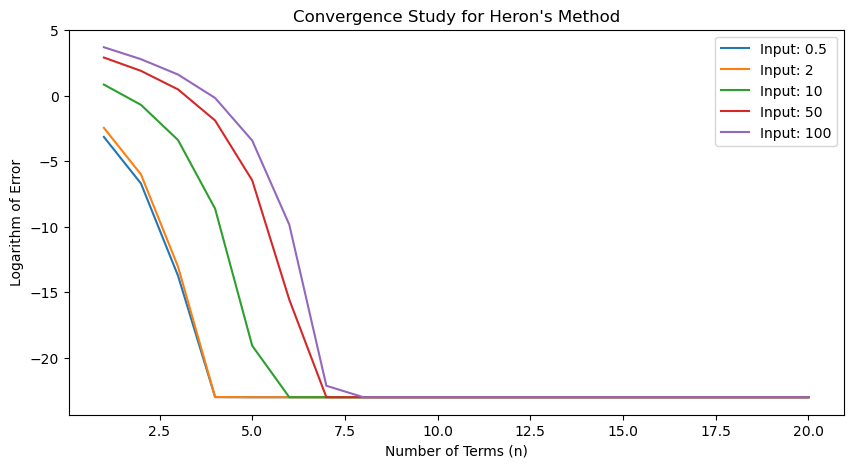

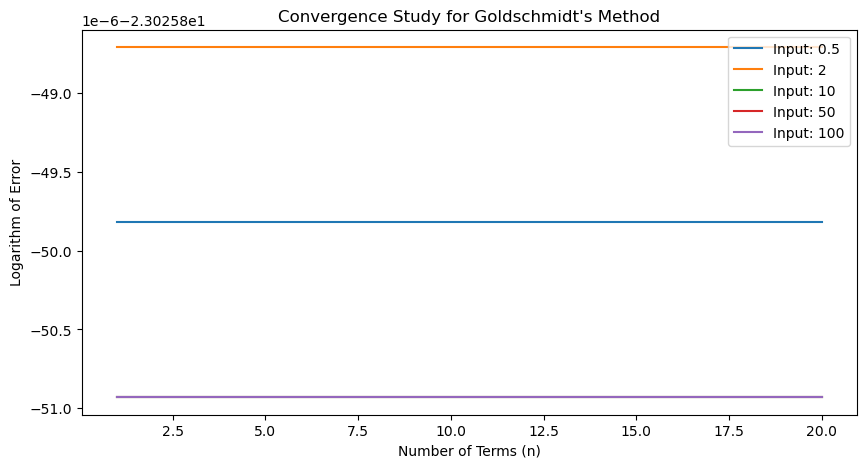

In [10]:
# Helper function to multiply all elements of a list
def multiplyList(myList):
    result = 1
    for x in myList:
        result *= x
    return result
        
    return 1/value
# Heron's square root method
def heron(a, n):
    if a == 0:
        return 0
    x = a
    for _ in range(n):
        x = 0.5 * (x + a / x)
    return x

# Goldschmidt's square root method
def gold(a, n):
    if a == 0:
        return 0
    b = a
    kn = 1/math.sqrt(a)
    k_values = [kn]
    for _ in range(n):
        b *= kn**2
        kn = (3 - b) / 2
        k_values.append(kn)
    return a * multiplyList(k_values)

def calculate_log_error(approx_value, true_value):
    epsilon = 1e-10
    error = abs(true_value - approx_value)
    return math.log(error + epsilon)

def experiment(method, values, n_values):
    results = []
    for value in values:
        for n in n_values:
            result = method(value, n)
            true_value = math.sqrt(value)
            log_error = calculate_log_error(result, true_value)
            results.append((value, n, result, true_value, log_error))
    return results

# Define input values
input_values = [0.5, 2, 10, 50, 100]
n_values = range(1, 21)  # Adjust the range of n values as needed

# Heron's method
heron_results = experiment(heron, input_values, n_values)

# Goldschmidt's method
goldschmidt_results = experiment(gold, input_values, n_values)

# Plotting for Heron's method
plt.figure(figsize=(10, 5))
plt.title("Convergence Study for Heron's Method")
for value in input_values:
    value_results = [result for result in heron_results if result[0] == value]
    plt.plot([result[1] for result in value_results], [result[4] for result in value_results], label=f'Input: {value}')

plt.xlabel('Number of Terms (n)')
plt.ylabel('Logarithm of Error')
plt.legend()
plt.show()

# Plotting for Goldschmidt's method
plt.figure(figsize=(10, 5))
plt.title("Convergence Study for Goldschmidt's Method")
for value in input_values:
    value_results = [result for result in goldschmidt_results if result[0] == value]
    plt.plot([result[1] for result in value_results], [result[4] for result in value_results], label=f'Input: {value}')

plt.xlabel('Number of Terms (n)')
plt.ylabel('Logarithm of Error')
plt.legend()
plt.show()

Indeed, in the absence of any error in the initial guess, the Goldschmidt method proves to be exceptionally potent, surpassing even the efficacy of Heron's method.Certainly, the Goldschmidt method exhibits immediate convergence with remarkable accuracy, reaching logarithmic errors within the range of approximately [-49, -51]. In contrast, Heron's method achieves a final accuracy in the order of ~ -25. Additionally, it's noteworthy that Goldschmidt's final accuracy varies with different input values, whereas Heron's method consistently converges to the same final accuracy regardless of the input value.

### But when we introduce error in the initial guess:

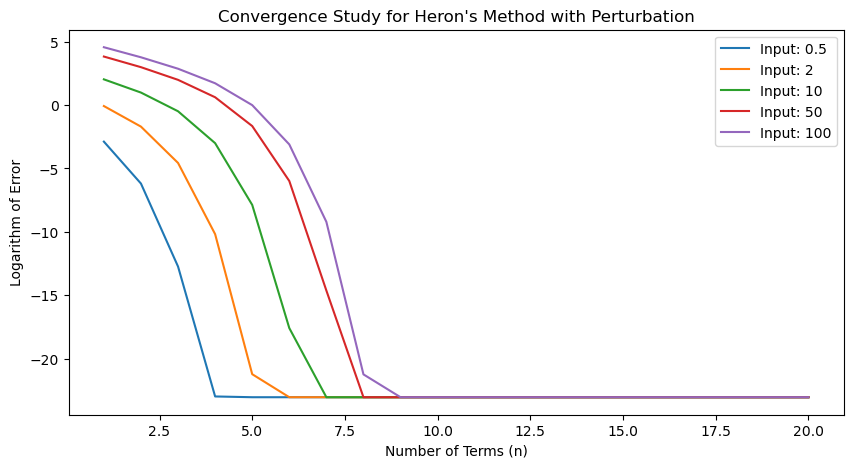

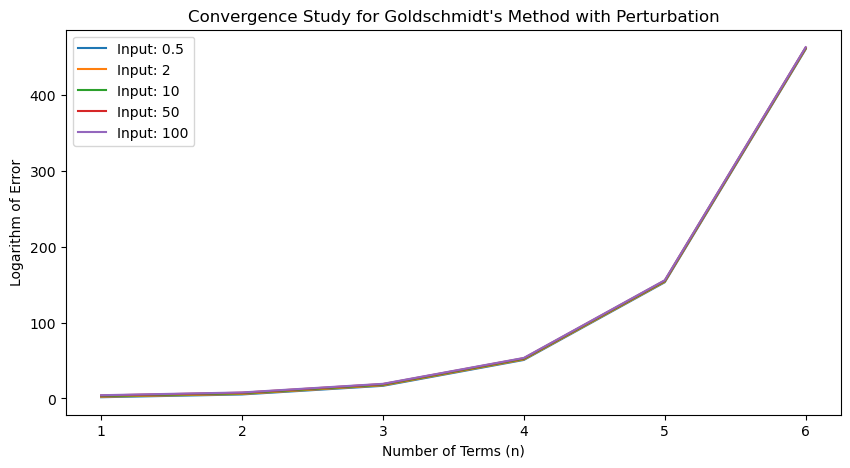

In [11]:
import random

# Perturbation factor for initial guess
perturbation_factor = 0.1
input_value = 10 #Can choose any value, just needed one 
# True square root value
true_sqrt_value = math.sqrt(input_value)
perturbation = (2 + perturbation_factor * random.uniform(-1, 1))
# Heron's Method with perturbation
# Heron's square root method
def heron(a, n):
    if a == 0:
        return 0
    x = a * (perturbation) #Perturb the initial guess
    for _ in range(n):
        x = 0.5 * (x + a / x)
    return x

# Goldschmidt's Method with perturbation
def gold(a, n):
    if a == 0:
        return 0
    b = a * perturbation
    kn = (1/math.sqrt(a)) * (perturbation) #Perturb the initial guess
    k_values = [kn]
    for _ in range(n):
        b *= kn**2
        kn = (3 - b) / 2
        k_values.append(kn)
    return a * multiplyList(k_values)

# Perform the experiment with perturbations
heron_results_perturbed = experiment(heron, input_values, n_values)
goldschmidt_results_perturbed = experiment(gold, input_values, n_values)

# Plotting for Heron's method
plt.figure(figsize=(10, 5))
plt.title("Convergence Study for Heron's Method with Perturbation")
for value in input_values:
    value_results = [result for result in heron_results_perturbed if result[0] == value]
    plt.plot([result[1] for result in value_results], [result[4] for result in value_results], label=f'Input: {value}')

plt.xlabel('Number of Terms (n)')
plt.ylabel('Logarithm of Error')
plt.legend()
plt.show()

# Plotting for Goldschmidt's method
plt.figure(figsize=(10, 5))
plt.title("Convergence Study for Goldschmidt's Method with Perturbation")
for value in input_values:
    value_results = [result for result in goldschmidt_results_perturbed if result[0] == value]
    plt.plot([result[1] for result in value_results], [result[4] for result in value_results], label=f'Input: {value}')

plt.xlabel('Number of Terms (n)')
plt.ylabel('Logarithm of Error')
plt.legend()
plt.show()

In [12]:
# Print values
print("\nHeron's Method with Perturbation:")
for result in heron_results_perturbed:
    print(f"Input: {result[0]}, Terms: {result[1]}, Computed: {result[2]}, True Value: {result[3]}, Log Error: {result[4]}")

print("\nGoldschmidt's Method with Perturbation:")
for result in goldschmidt_results_perturbed:
    print(f"Input: {result[0]}, Terms: {result[1]}, Computed: {result[2]}, True Value: {result[3]}, Log Error: {result[4]}")


Heron's Method with Perturbation:
Input: 0.5, Terms: 1, Computed: 0.7630598515807074, True Value: 0.7071067811865476, Log Error: -2.8832419664778266
Input: 0.5, Terms: 2, Computed: 0.7091582232064941, True Value: 0.7071067811865476, Log Error: -6.189212260008407
Input: 0.5, Terms: 3, Computed: 0.7071097483765367, True Value: 0.7071067811865476, Log Error: -12.727861483259794
Input: 0.5, Terms: 4, Computed: 0.707106781192773, True Value: 0.7071067811865476, Log Error: -22.965457256312543
Input: 0.5, Terms: 5, Computed: 0.7071067811865475, True Value: 0.7071067811865476, Log Error: -23.025849819718047
Input: 0.5, Terms: 6, Computed: 0.7071067811865475, True Value: 0.7071067811865476, Log Error: -23.025849819718047
Input: 0.5, Terms: 7, Computed: 0.7071067811865475, True Value: 0.7071067811865476, Log Error: -23.025849819718047
Input: 0.5, Terms: 8, Computed: 0.7071067811865475, True Value: 0.7071067811865476, Log Error: -23.025849819718047
Input: 0.5, Terms: 9, Computed: 0.7071067811865

Upon examining the graphs and the results, it's evident that Heron's method maintains consistent final accuracy despite perturbations in the initial guess, affirming its self-correcting nature. In contrast, the Goldschmidt algorithm exhibits substantial error escalation when initialized poorly. The exponential surge in error with an unfavorable initial guess starkly contrasts the remarkable accuracy achieved with a good initial guess, surpassing even Heron's method. This underscores the Goldschmidt algorithm's susceptibility to error amplification under adverse conditions.

# b) Fixed point methods for sin(x) = exp(-x)

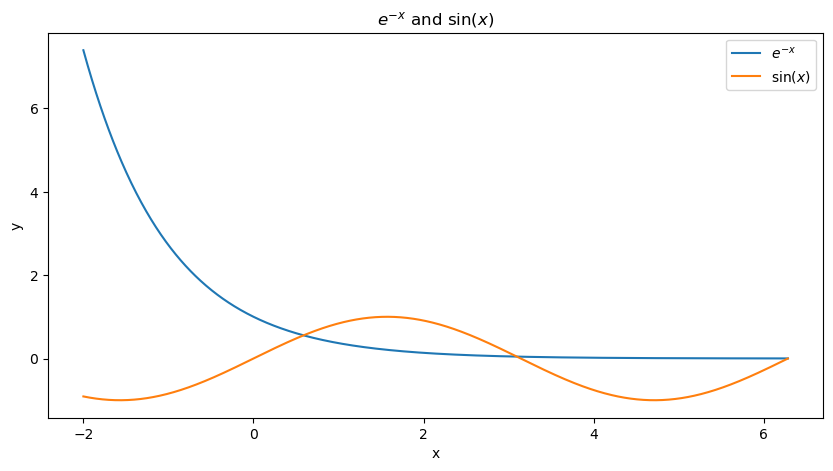

In [13]:
#We check to see if it works:
# Define the range of x values
x_values = np.linspace(-2, 2 * np.pi, 1000)

# Calculate the corresponding y values for e^-x and sin(x)
y_exp = np.exp(-x_values)
y_sin = np.sin(x_values)

# Plot the functions
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_exp, label='$e^{-x}$')
plt.plot(x_values, y_sin, label='$\sin(x)$')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('$e^{-x}$ and $\sin(x)$')
plt.legend()

# Show the plot
plt.show()

### Now, that we know it works, we find it:

A fixed point iteration is characterized by the recurrence: xn+1 = ϕ(xn)
If the sequence x0, x1,(...) converges to some number α, then it is obvious that α must be a fixed point of ϕ, meaning
α = ϕ(α).

We have three possibilites for the iteration:
    1. ϕ(xn+1) = arcsin(exp(-x))
    2. ϕ(xn+1) = -ln(sin(x))
    3. ϕ(xn+1) = x + k(exp(-x) - sin(x)) for some k


In [14]:
#By using a computer we find α
from scipy.optimize import fsolve
def equation(x):
    return math.sin(x)-math.exp(-x)
print(fsolve(equation, 0.5))

[0.58853274]


Thus, 0.58853274 ~ ϕ(0.58853274); α = 0.58853274
So, now we want to compute the derivatives of the iterative method to find their convergence.

    1. ϕ(x) = arcsin(exp(-x)) => ϕ'(x) = - (exp(-x))/(sqrt(1-exp(-2x))) => ϕ'(0.58853274) ~ -0.6674326997204006
       So, |ϕ'(a)| < 1, thus it is linearly convergent.
       
    2. ϕ(x) = -ln(sin(x))  => ϕ'(x) = -cot(x)  => ϕ'(0.58853274) ~ 1.4982784253725132
       So, not convergent because |ϕ'(a)| > 1
       
    3. ϕ(x) = x + k(exp(-x) - sin(x)) => ϕ'(x) = 1 + k(-exp(-x) - cos(x)) => ϕ'(0.58853274) ~ ???
       We know the function -exp(-x) - cos(x) is a function that initially increase but then stays periodic.(See graph below)
       ϕ'(0.58853274) ~ 1 + k(-1.3868973346063092) thus, we need to find k such that ϕ'(0.58853274) = 0, so we find k like this:
       k = -1/(-1.3868973346063092) ~ 0.72103390427516
       Thus, ϕ'(0.58853274) ~ 0, which means that it is quadratically convergent!

Derivative of 1: -0.6674326997204006

Derivative of 2: 1.4982784253725132

Some part of derivative 3: -1.3868973346063092

Value of k: 0.72103390427516



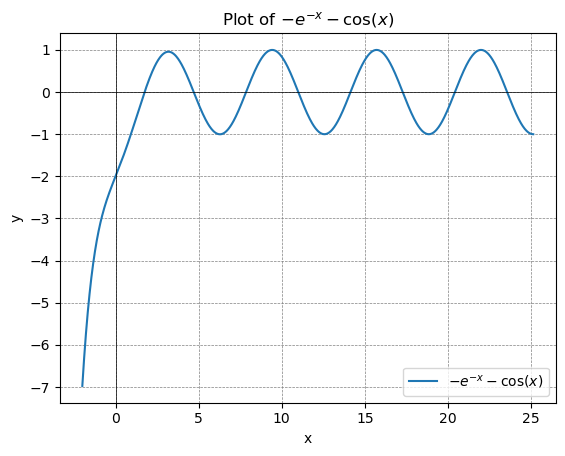

In [15]:
a = 0.58853274
der1 = (-1)*(math.exp(-a)) / (math.sqrt(1-math.exp(-2*a)))
print(f"Derivative of 1: {der1}\n")
der2 = 1/math.tan(a)
print(f"Derivative of 2: {der2}\n")
der3 = -math.exp(-a) - math.cos(a)
print(f"Some part of derivative 3: {der3}\n")
kvalue = -1/(-1.3868973346063092)
print(f"Value of k: {kvalue}\n")
# Define the function
def my_function(x):
    return -np.exp(-x) - np.cos(x)

# Generate x values in the specified range
x_values = np.linspace(-2, 8 * np.pi, 1000)

# Calculate corresponding y values
y_values = my_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label=r'$-e^{-x} - \cos(x)$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Plot of $-e^{-x} - \cos(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Our two fixed point methods:

### Linearly Convergent
ϕ(x) = arcsin(exp(-x))


### Quadratically convergent
ϕ(x) = x + k(exp(-x) - sin(x)), where k = 0.72103390427516

Now, we show their performance;

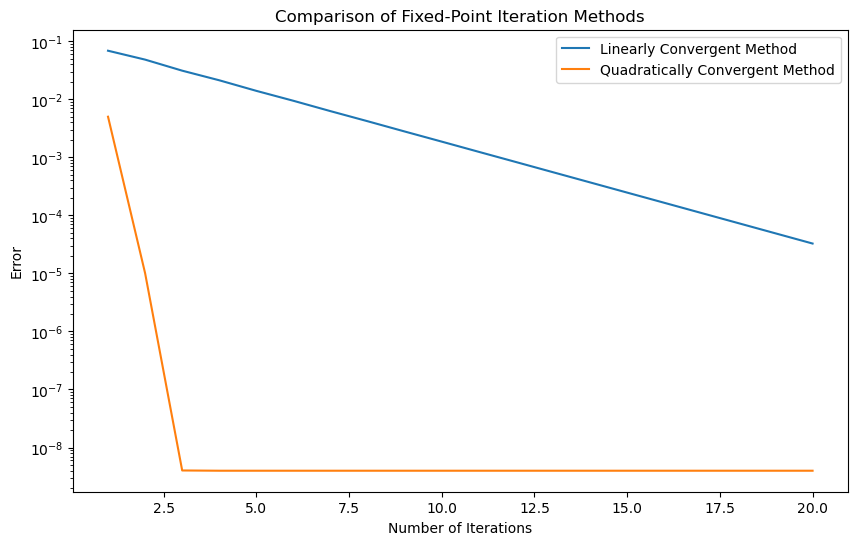

In [16]:
def fixed1_linear(x, n):
    for i in range(n):
        x = math.asin(math.exp(-x))
    
    return x

def fixed2_quad(x, n):
    for i in range(n):
        x = x + 0.72103390427516*(math.exp(-x) - math.sin(x))
    return x

# Function to calculate the error
def calculate_error(approx_value, true_value):
    return abs(true_value - approx_value)

# Range of iterations
iterations = range(1, 21)

# Initial guess for the root
initial_guess = 0.7

# True root value (calculated externally)
true_root_value = 0.58853274

# Calculate values for each iteration
linear_errors = [calculate_error(fixed1_linear(initial_guess, n), true_root_value) for n in iterations]
quad_errors = [calculate_error(fixed2_quad(initial_guess, n), true_root_value) for n in iterations]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, linear_errors, label='Linearly Convergent Method')
plt.plot(iterations, quad_errors, label='Quadratically Convergent Method')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.title('Comparison of Fixed-Point Iteration Methods')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

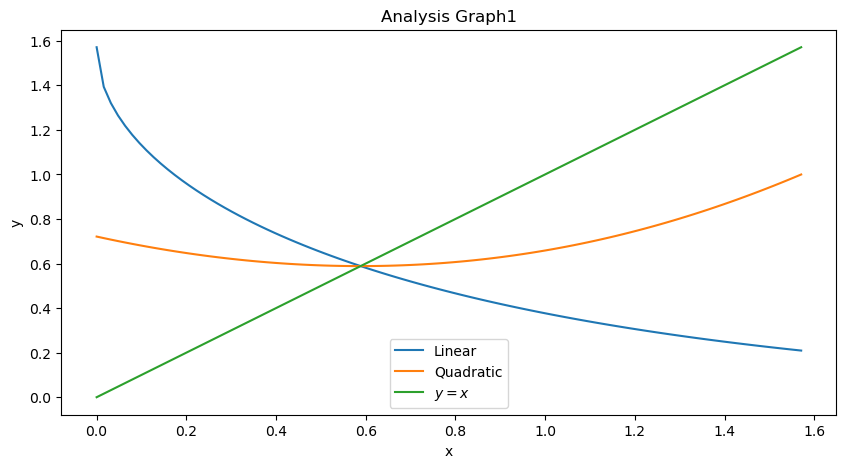

In [17]:
# Define the range of x values
x_values = np.linspace(0, math.pi/2, 100)

# Calculate the corresponding y values for e^-x and sin(x)
y_lin = np.arcsin(np.exp(-x_values))
y_quad = x_values + 0.72103390427516*(np.exp(-x_values) - np.sin(x_values))
y_b = x_values

# Plot the functions
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_lin, label='Linear')
plt.plot(x_values, y_quad, label='Quadratic')
plt.plot(x_values, y_b, label='$y=x$')
# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title("Analysis Graph1")
plt.legend()

# Show the plot
plt.show()

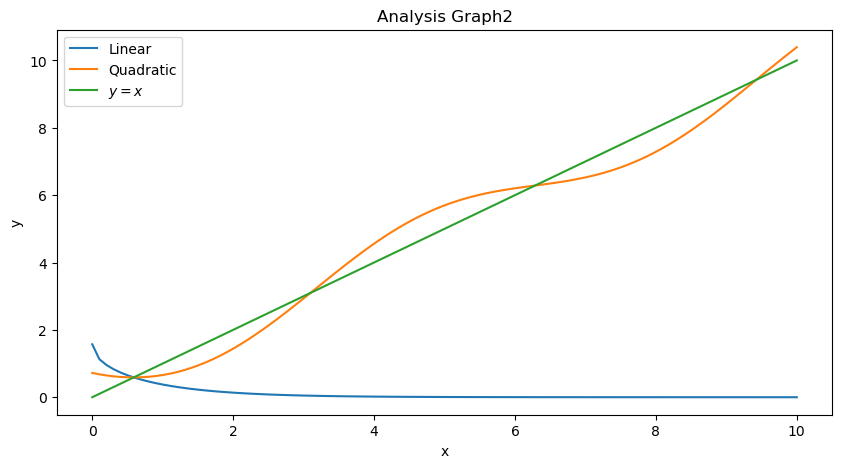

In [18]:
# Define the range of x values
x_values = np.linspace(0, 10, 100)

# Calculate the corresponding y values for e^-x and sin(x)
y_lin = np.arcsin(np.exp(-x_values))
y_quad = x_values + 0.72103390427516*(np.exp(-x_values) - np.sin(x_values))
y_b = x_values

# Plot the functions
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_lin, label='Linear')
plt.plot(x_values, y_quad, label='Quadratic')
plt.plot(x_values, y_b, label='$y=x$')
# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title("Analysis Graph2")
plt.legend()

# Show the plot
plt.show()

C:\Users\gucol\AppData\Local\Temp\ipykernel_22792\1982154340.py:5: RuntimeWarning: invalid value encountered in arcsin
  y_lin = np.arcsin(np.exp(-x_values))


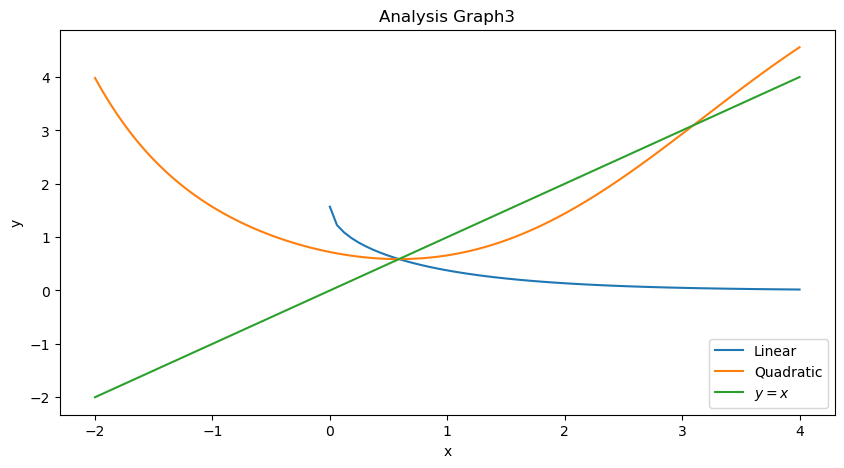

First root (Quad): 0.5885327439809771
Second root (Quad): 3.0963639324090764
The smallest negative x (Quad): -1.7458897723872144


In [19]:
# Define the range of x values
x_values = np.linspace(-2, 4, 100)

# Calculate the corresponding y values for e^-x and sin(x)
y_lin = np.arcsin(np.exp(-x_values))
y_quad = x_values + 0.72103390427516*(np.exp(-x_values) - np.sin(x_values))
y_b = x_values

# Plot the functions
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_lin, label='Linear')
plt.plot(x_values, y_quad, label='Quadratic')
plt.plot(x_values, y_b, label='$y=x$')
# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title("Analysis Graph3")
plt.legend()

# Show the plot
plt.show()

from scipy.optimize import bisect

# Define the equation
def equation(x):
    return math.exp(-x) - math.sin(x)

# Find the first root in the interval [0, 2]
root1 = bisect(equation, 0, 2)

# Find the second root in the interval [3, 5]
root2 = bisect(equation, 3, 5)

print(f"First root (Quad): {root1}")
print(f"Second root (Quad): {root2}")

# Define the equation
def equation(x):
    return x + 0.72103390427516 * (math.exp(-x) - math.sin(x)) - 3.0963639324090764

# Find the root
root = fsolve(equation, -5)  # Starting from -5 to find the smallest negative root

print(f"The smallest negative x (Quad): {root[0]}")

In [20]:
# Linear iteration function
def linear_iteration(x, n):
    for i in range(n):
        x = math.asin(math.exp(-1 * x))
        print(f'Terms: {i + 1}    Linear Iteration: {x}')

# Quadratic iteration function
def quadratic_iteration(x, n):
    for i in range(n):
        x = x + 0.72103390427516 * (math.exp(-x) - math.sin(x))
        print(f'Terms: {i + 1}    Quadratic Iteration: {x}')

# True value function
def true_value(x):
    return math.asin(math.exp(-1 * x))

# Perform iterations for multiple initial guesses
initial_guesses = [0.2, 1.0]

for initial_guess in initial_guesses:
    print(f'\nInitial Guess x: {initial_guess}')
    
    # Linear Iteration
    print('\nLinear Iteration:')
    linear_iteration(initial_guess, 25)  

    # Quadratic Iteration
    print('\nQuadratic Iteration:')
    quadratic_iteration(initial_guess, 5) 


Initial Guess x: 0.2

Linear Iteration:
Terms: 1    Linear Iteration: 0.9591969745502804
Terms: 2    Linear Iteration: 0.39325879731302027
Terms: 3    Linear Iteration: 0.740766940300104
Terms: 4    Linear Iteration: 0.496951651687797
Terms: 5    Linear Iteration: 0.6540207980857333
Terms: 6    Linear Iteration: 0.5467935277039256
Terms: 7    Linear Iteration: 0.6172597520598311
Terms: 8    Linear Iteration: 0.5697488167375877
Terms: 9    Linear Iteration: 0.6012424882160823
Terms: 10    Linear Iteration: 0.5801270052854701
Terms: 11    Linear Iteration: 0.5941773167864913
Terms: 12    Linear Iteration: 0.5847806734252781
Terms: 13    Linear Iteration: 0.5910438093691596
Terms: 14    Linear Iteration: 0.5868598125035414
Terms: 15    Linear Iteration: 0.589650664935252
Terms: 16    Linear Iteration: 0.587787209309678
Terms: 17    Linear Iteration: 0.5890306064688163
Terms: 18    Linear Iteration: 0.5882005737987407
Terms: 19    Linear Iteration: 0.5887544984603549
Terms: 20    Linear I

In examining the convergence behaviors of the linear and quadratic iteration methods, we observe distinct patterns that provide valuable insights.

For the linear iteration, the Analysis graphs and the Comparison graph collectively reveal a clear linear convergence. In a co-web plot, we can visualize convergence occurring for favorable initial guesses, but the process takes time. The plot exhibits several oscillations before settling on the correct solution along the y=x function.

In contrast, the quadratic iteration method exhibits evident quadratic convergence. Analysis graphs and the Comparison graph indicate rapid progress towards the final answer, with significant closeness achieved after just one iteration. Subsequent iterations bring the solution even closer.

A numerical examination of the results reinforces these observations. As we can see above, it takes a lot more terms for the linear iteration to achieve an acceptable approximation. On the other hand, it takes a lot less time for the quadratic iteration to get a good approximation. In just 5 iterations, the quadratic method achieves convergence, a feat that the linear method only accomplishes after approximately 25 iterations—consistent with the fact that 5 squared equals 25. Intriguingly, the linear method, even with 25 terms, falls short of attaining the precision achieved by the quadratic method in just 5 terms.

For the initial guesses, as we know, the function arcsin is defined only on the domain [-1,1] thus e^-x must be in [-1, 1]. As we know, the function e^-x as range [0, infinity]. As we can see on Analysis graph 1 and 2, our initial guess can be [0, infinity], thus our linear as global convergence, but only on the x on which the function is defined on. (recall the domain of arcsin is only [-1, 1])

For the quadratic function, which has no domain restrictions due to its constituent functions, the initial guess needs careful consideration to converge specifically to the smallest root. By computing the second root and finding the corresponding negative x (see Analysis graph 3), we determine that the initial guess should be in the range ]-1.7458897723872144, 3.0963639324090764[ to ensure convergence to the desired root. This consideration prevents convergence to alternate solutions or potential non-convergence.

Also, we know they are linear and convergent by construction. This is how we built them.

# c) Iterative method

Design an iterative method to solve the equation 4y^3 − 3y = a, where 0 ≤ a ≤ 1 is given.
I will use the Newton-Raphson method, 
       ϕ(x) = x − f(x) / f′(x)
Here: f(y) = 4y^3 - 3y - a
Therefore, we have ϕ(y) = y - (4y^3 - 3y -a)/(12y^2 - 3)
=> ϕ(y) =(8y^3 + a)/(12y^2 - 3)

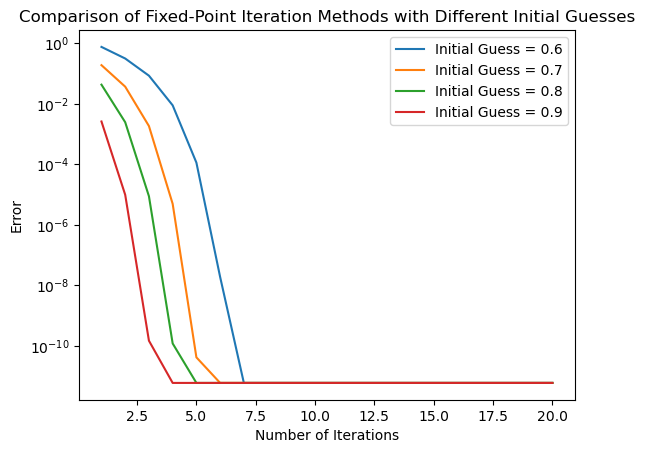

In [23]:
#We are given a, here we are interested in cos(60) = 1/2 so a=1/2=0.5
def iterMethod(y, n):
    for _ in range(n):##Apply iterative equation
        y = (8*y**3 + 0.5)/ (12*y**2 -3)
    return y

# Function to calculate the error
def calculate_error(approx_value, true_value):
    return abs(true_value - approx_value)

# Range of iterations
iterations = range(1, 21)

# Different initial guesses
initial_guesses = [0.6, 0.7, 0.8, 0.9]

# y is the value of cos(20)~0.93969262078
true_value = 0.93969262078

# Calculate values for each initial guess
for initial_guess in initial_guesses:
    method = [calculate_error(iterMethod(initial_guess, n), true_value) for n in iterations]
    plt.plot(iterations, method, label=f'Initial Guess = {initial_guess}')

# Plotting
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.title('Comparison of Fixed-Point Iteration Methods with Different Initial Guesses')
plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

The convergence seems to be quadratic, lets be sure of that:
We know that α = ϕ(α), is when α ~ 0.93969262078
Compute ϕ'(α):
    
    1. ϕ'(y)= (8/3)y(4y^3-3y-0.5)/(4y^2-1)^2
    
    2. |ϕ'(α)| ~ 0, so it is truly quadratically convergent. (Can also see that (4y^3-3y-0.5)=0 is literally our goal)
    
Also, we observe that the convergence performance of the algorithm highly depends on the initial guess. However, only the speed of convergence seems to be affected by the initial guess, not the final accuracy.

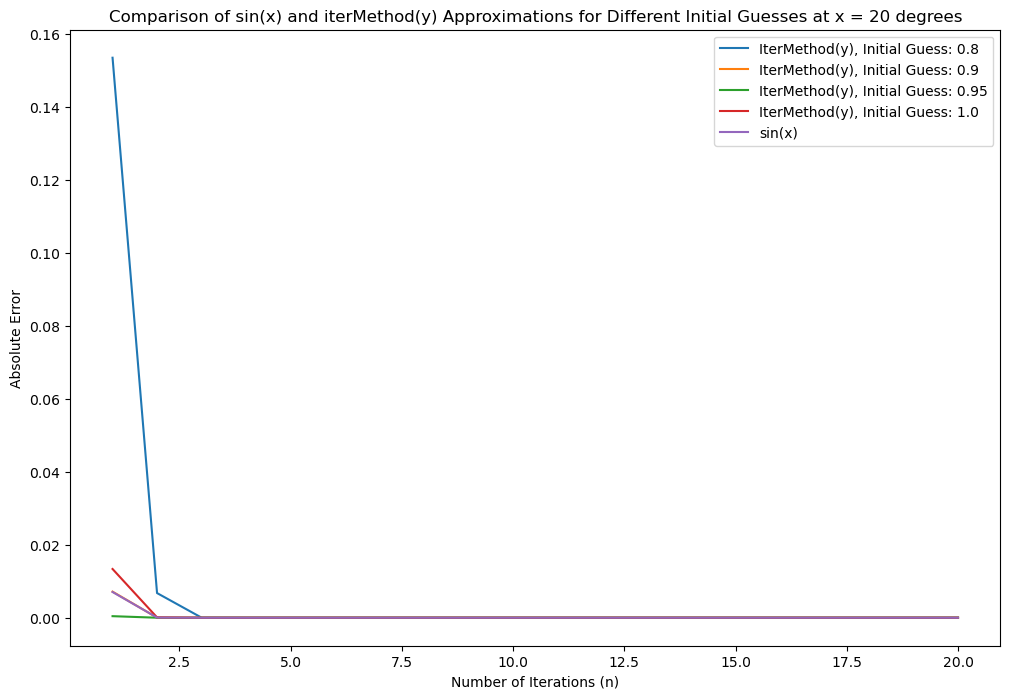

In [22]:
def sin(x, n):#My sin function from part1
    value = 0
    for i in range(n):
        value += (((-1)**i)*(x**(2*i+1)))/math.factorial(2*i + 1) #We use the above equation
    return value

def iterMethod(y, n):#We are given a, here we are interested in cos(60) = 1/2 so a=1/2=0.5
    for _ in range(n):##Apply iterative equation
        y = (8*y**3 + 0.5)/ (12*y**2 -3)
    return y

# Define the values
x_value = math.radians(20)  # x = pi/9

# Calculate the true value using sin
true_value = math.sin(x_value)

# Values for n (number of iterations)
n_values = range(1, 21)

# Different initial guesses
initial_guesses = [0.8, 0.9, 0.95, 1.0]

# Plot for each initial guess
plt.figure(figsize=(12, 8))
for initial_guess in initial_guesses:
    iter_method_values = [math.sqrt(1 - iterMethod(initial_guess, n) ** 2) for n in n_values]
    iter_method_errors = [abs(true_value - iter_val) for iter_val in iter_method_values]
    
    plt.plot(n_values, iter_method_errors, label=f'IterMethod(y), Initial Guess: {initial_guess}')

# Plot sin function for comparison
sin_values = [sin(x_value, n) for n in n_values]
sin_errors = [abs(true_value - sin_val) for sin_val in sin_values]
plt.plot(n_values, sin_errors, label='sin(x)')

plt.xlabel('Number of Iterations (n)')
plt.ylabel('Absolute Error')
plt.title('Comparison of sin(x) and iterMethod(y) Approximations for Different Initial Guesses at x = 20 degrees')
plt.legend()
plt.show()

The effectiveness of the iteration method is notably influenced by the choice of initial guesses. When initialized with values of 0.8 and 1.0, the iteration method exhibits lower performance compared to the power series method. However, when provided with a "good initial guess," characterized by proximity to the true value, the iteration method demonstrates remarkable performance. In such cases, the convergence towards the true value is almost instantaneous. Thus, for initial guesses of 0.95 and 0.9, the iteration method outperforms the power series, while for other initial guesses, its performance is not as favorable.

It's worth noting that the effectiveness of the power series method, as demonstrated in part 1a), is heavily influenced by the small angle approximation. The observation that 20 degrees is equivalent to pi/9 reveals that the performance of the basic power series algorithm is significantly impacted by the magnitude of the input. As established in part 1a), the algorithm performs optimally when dealing with smaller inputs, highlighting the correlation between input size and algorithm efficiency. (which is the case here as pi/9 ~ 0.34906585039, is very small)